In [143]:
from scipy.optimize import minimize, leastsq
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math
import scipy

In [144]:
alpha=0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t_0 = 0
t_f = 25

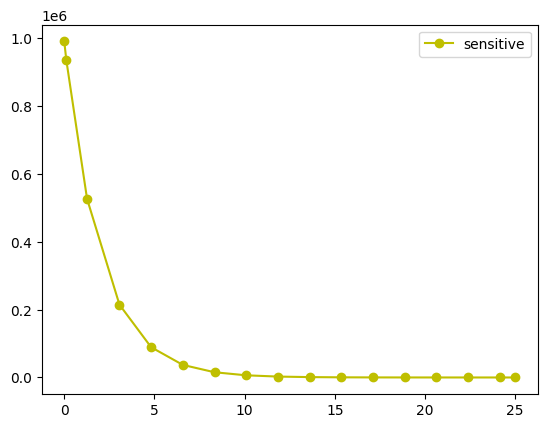

In [145]:
def dsdt(t, s):
    return -alpha * s

soln = solve_ivp(dsdt, (t_0, t_f), [S0], dense_output=True)
t, y = soln.t, soln.y[0]
plt.plot(t, y, '-o', color='y', label='sensitive')
plt.legend()
plt.show()

S0 = 989978.6396581428, alpha = 0.4998560013252775


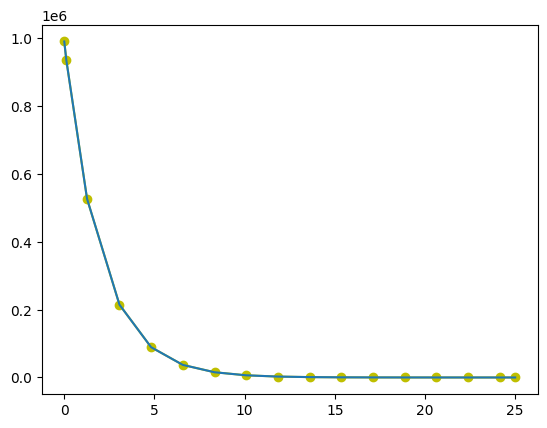

17


In [157]:
t1 = t
def s_func(tm, s, a):
    return s * ((math.e **(-a * tm)))

def diff(p, y, tm):
    s, a = p
    return y - s_func(tm, s, a)

p0 =  (1000, 0.1)
s_result, _ = leastsq(diff, p0, args=(y, t1))
print(f"S0 = {s_result[0]}, alpha = {s_result[1]}")

plt.plot(t, y, '-o', color='y', label='sensitive')
plt.plot(t1, s_func(t, s_result[0], s_result[1]))
plt.show()

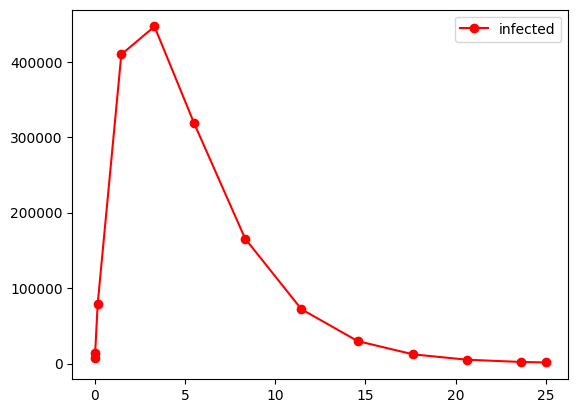

In [199]:
def didt(t, i):
    return alpha * soln.sol(t) - beta * i

sol_3 = solve_ivp(didt, (t_0, t_f), [I0], dense_output=True)
t3, y3 = sol_3.t, sol_3.y[0]
plt.plot(t3, y3, '-o', color='r', label='infected')
plt.legend()
plt.show()

I0 = 8085.198135475575, S0 = 1252812.5231679988, alpha =  0.3837629446556309


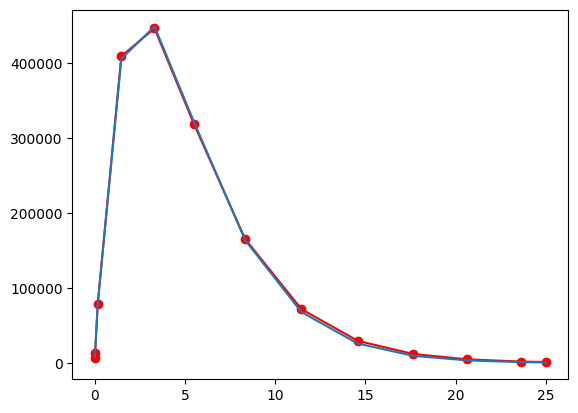

In [148]:
def i_func(tm, i, s, a):
    return (i + a * s *tm)*((math.e **(-a * tm)))

def diff(p, y, tm):
    i, s, a = p
    return y - i_func(tm, i, s, a)

p0 =  (7000, 990000, 0.5)
i_result, _ = leastsq(diff, p0, args=(y3, t3))
print(f"I0 = {i_result[0]}, S0 = {i_result[1]}, alpha =  {i_result[2]}")

plt.plot(t3, y3, '-o', color='r', label='infected')
plt.plot(t3, i_func(t3, i_result[0], i_result[1], i_result[2]))
plt.show()

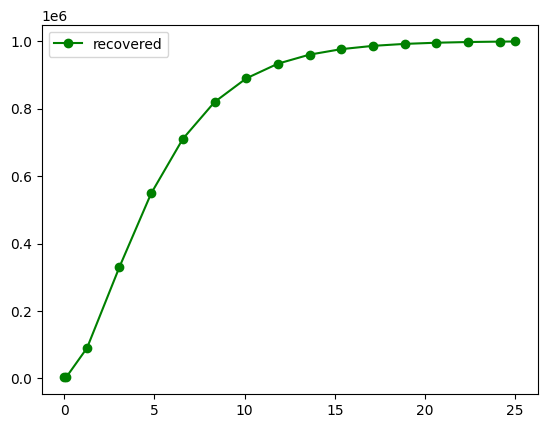

In [183]:
St = list(soln.sol(t))
It = list(sol_3.sol(t))
Rt = [N - sum(d) for d in zip(St, It)]

f = scipy.interpolate.interp1d(soln.t, Rt, kind="cubic")
plt.plot(list(soln.t), f(soln.t)[0], "-o",  color='g', label='recovered')
plt.legend()
plt.show()

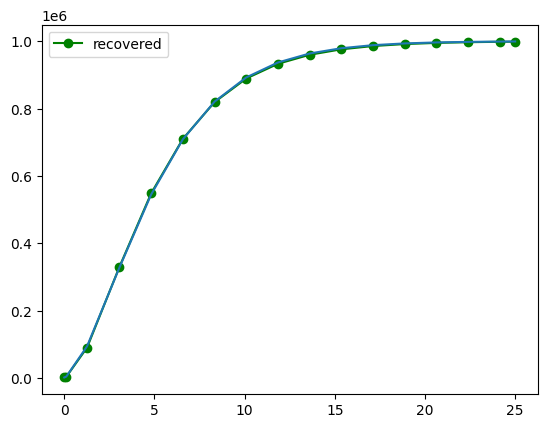

In [184]:
St_q = list(s_func(t, s_result[0], s_result[1]))
It_q = list(i_func(t, i_result[0], i_result[1], i_result[2]))
Rt_q = [N - sum(d) for d in zip(St_q, It_q)]

f2 = scipy.interpolate.interp1d(soln.t, Rt_q, kind="cubic")
plt.plot(list(soln.t), f(soln.t)[0], "-o",  color='g', label='recovered')
plt.plot(t, f2(t))
plt.legend()
plt.show()

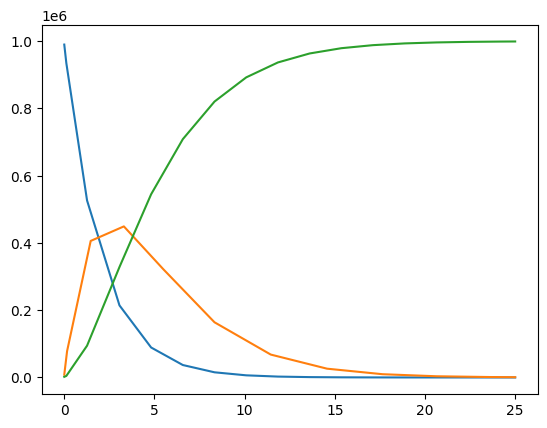

In [185]:
plt.plot(t1, s_func(t, s_result[0], s_result[1]))
plt.plot(t3, i_func(t3, i_result[0], i_result[1], i_result[2]))
plt.plot(t, f2(t))
plt.show()

In [201]:
bracket = (0, 25)
result = scipy.optimize.minimize_scalar(lambda x, i, s, a: -i_func(x, i, s, a), bracket=bracket, \
                                        args=([0], i_result[1], i_result[2]))
print(result.x)

[2.60577535]
